In [51]:
import pandas as pd
import statsmodels.formula.api as smf
from exchange.board import *
from matplotlib import pyplot as plt

history = load_file('../DATA/BF-TEST.log')
df = history.dollar_bar(tick_vol=50)
df

,time_stamp,open,close,high,low
time,,,,,
0,2020-05-04 23:46:06.755482,9606800.0,9603390.0,9608500.0,9602500.0
1,2020-05-04 23:46:52.193094,9603740.0,9599980.0,9609020.0,9598540.0
2,2020-05-04 23:47:35.195088,9600000.0,9603570.0,9603570.0,9594030.0
3,2020-05-04 23:48:47.474026,9603570.0,9607500.0,9607500.0,9595320.0
4,2020-05-04 23:49:16.466727,9607510.0,9616460.0,9616460.0,9605710.0
...,...,...,...,...,...
769,2020-05-05 05:22:53.532117,9844740.0,9844960.0,9848250.0,9841760.0
770,2020-05-05 05:23:25.928302,9845050.0,9848950.0,9850000.0,9844260.0
771,2020-05-05 05:23:57.737884,9849430.0,9851050.0,9851840.0,9846920.0


In [52]:
df = df[['close']]
df.reset_index(inplace=True)
record_number = len(df)
record_number

774

In [53]:
model = smf.ols(formula='close ~ time', data=df)
results = model.fit()

results


In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     889.2
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          1.35e-130
Time:                        22:06:37   Log-Likelihood:                -9650.8
No. Observations:                 774   AIC:                         1.931e+04
Df Residuals:                     772   BIC:                         1.931e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.563e+06   4525.717   2112.983      0.000    9.55e+06    9.57e+06
time         302.2910     10.137     29.819      0.000     282.391     322.191
==============================================================================
Omnibus:                      696.393   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.948
Skew:                          -0.031   Prob(JB):                     2.35e-11
Kurtosis:                       1.770   Cond. No.                         892.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
results.params



Intercept    9.562763e+06
time         3.022910e+02
dtype: float64

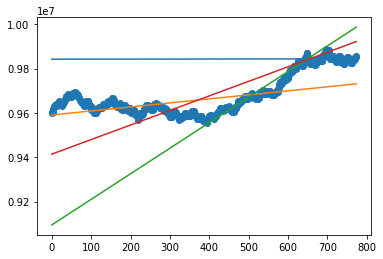

In [60]:
X = df['time']
plt.scatter(X, df['close'])

a = 1.9735
b = 9842621
plt.plot(X, a * X + b)


a = 181.6
b = 9590786
plt.plot(X, a * X + b)

a = 1154
b = 9094710
plt.plot(X, a * X + b)

a = 657
b = 9414133
plt.plot(X, a * X + b)


plt.show()
